# Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

### Data Preparation

In [3]:
churn_data= pd.read_csv('train.csv')
unseen_data = pd.read_csv("test.csv")
churn_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
unseen_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [5]:
print(unseen_data.shape)

(30000, 171)


In [6]:
print (churn_data.shape)
print (churn_data.info())
churn_data.describe()

(69999, 172)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [7]:
dict_data = pd.read_csv("data_dictionary.csv")
dict_data

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [8]:
print ("The cutomer-level information for each customer is represented by %d features"% (churn_data.shape[1]))

The cutomer-level information for each customer is represented by 172 features


In [9]:
#list of columns
pd.DataFrame(churn_data.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,arpu_6
9,arpu_7


looks like several dummy colums are already created

In [10]:
# function to get missing values above a cutoff percentage
def getMissingValues(missingCutoff):
    missing = round(100*(churn_data.isnull().sum()/churn_data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [11]:
# imputes NaN with zeroes
def imputeNan(data,imputeColList=False,missingColList=False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [12]:
# Missing values per column expressed as % of total number of values
getMissingValues(50)

There are 30 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8                   74.0
night_pck_user_6            75.0
night_pck_user_7            74.0
night_pck_user_8            74.0
fb_user_6                   75.0
fb_user_7                   74.0
fb_user_8                   74.0
dtype: flo

In [13]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeNan(churn_data,imputeCol)
imputeNan(unseen_data, imputeCol)

Taking a look at the categorical data, and splitting the id, date and categorical data

In [14]:
getMissingValues(50)


There are 3 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
dtype: float64

Lets get rid of these columns

In [15]:
missingcol = list(getMissingValues(50).index)
churn_data.drop(missingcol,axis=1,inplace=True)
unseen_data.drop(missingcol,axis=1,inplace=True)
churn_data.shape

There are 3 features having more than 50% missing values/entries


(69999, 169)

In [16]:
getMissingValues(5) 

There are 0 features having more than 5% missing values/entries


Series([], dtype: float64)

In [17]:
getMissingValues(2)

There are 88 features having more than 2% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [18]:
missingcol = list(getMissingValues(2).index)
print ("There are %d customers/MSISDN's having missing values for %s together"%(len(churn_data[churn_data[missingcol].isnull().all(axis=1)]),missingcol))
unseen_data[unseen_data[missingcol].isnull().all(axis=1)][missingcol].head()
churn_data[churn_data[missingcol].isnull().all(axis=1)][missingcol].head()


There are 88 features having more than 2% missing values/entries
There are 292 customers/MSISDN's having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_othe

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seems like there are **292 Customers** for whom **all** these features are without any value.
Let's drop these customers from the data. 

In [19]:
churn_data=churn_data[~churn_data[missingcol].isnull().all(axis=1)]
churn_data.shape

(69707, 169)

In [20]:
missingcol.remove('date_of_last_rech_8')
imputeNan(unseen_data,missingColList=missingcol)
imputeNan(churn_data,missingColList=missingcol)

In [21]:
getMissingValues(0)

There are 7 features having more than 0% missing values/entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
dtype: float64

In [22]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 'date_of_last_rech_6','last_date_of_month_7','last_date_of_month_8', 'date_of_last_rech_7', 'date_of_last_rech_8']
for c in col: 
    print("Unique values in column %s are %s" % (c,churn_data[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column date_of_last_rech_6 are ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/

In [23]:
#Some of these features take only one value. Lets impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8']
for c in col:
    print(churn_data[c].value_counts())
    churn_data[c].fillna(churn_data[c].mode()[0], inplace=True)
    unseen_data[c].fillna(unseen_data[c].mode()[0], inplace=True)
print("All the above features take only one value. Lets impute the missing values in these features with the mode")

0.0    69293
Name: loc_og_t2o_mou, dtype: int64
0.0    69293
Name: std_og_t2o_mou, dtype: int64
0.0    69293
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    69498
Name: last_date_of_month_7, dtype: int64
8/31/2014    69206
Name: last_date_of_month_8, dtype: int64
All the above features take only one value. Lets impute the missing values in these features with the mode


In [24]:
# Missing values per column expressed as % of total number of values
getMissingValues(0)

There are 3 features having more than 0% missing values/entries


date_of_last_rech_6    1.0
date_of_last_rech_7    1.0
date_of_last_rech_8    3.0
dtype: float64

In [25]:
# All these features are missing together
missingcol = list(getMissingValues(0).index)
print ("There are %d rows in total having missing values for these variables."%(len(churn_data[churn_data[missingcol].isnull().all(axis=1)])))

There are 3 features having more than 0% missing values/entries
There are 16 rows in total having missing values for these variables.


In [26]:
churn_data[churn_data['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
churn_data[churn_data['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
churn_data[churn_data['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'

unseen_data[unseen_data['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
unseen_data[unseen_data['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
unseen_data[unseen_data['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'

Let's take a look at the zero valued columns?

In [27]:
zero_columns=churn_data.columns[(churn_data == 0).all()]
print ("There are {} features which has only 0 as values. These features are \n{}".format(len(zero_columns),zero_columns))

There are 9 features which has only 0 as values. These features are 
Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')


In [28]:
churn_data.drop(zero_columns,axis=1,inplace=True)
unseen_data.drop(zero_columns,axis=1,inplace=True)

In [29]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(churn_data.shape[0]/69999 *100,2)))
print ("Number of customers: {}".format(churn_data.shape[0]))
print ("Number of features: {}".format(churn_data.shape[1]))

Percentage of data remaining after treating missing values: 99.58%
Number of customers: 69707
Number of features: 160


In [30]:
churn_data.reset_index(inplace=True,drop=True)
unseen_data.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_columns = list(churn_data.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [31]:
# converting to date format
for col in date_columns:
    churn_data[col] = pd.to_datetime(churn_data[col], format='%m/%d/%Y')
    unseen_data[col] = pd.to_datetime(unseen_data[col], format='%m/%d/%Y')    

In [32]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69707 entries, 0 to 69706
Columns: 160 entries, id to churn_probability
dtypes: datetime64[ns](6), float64(126), int64(28)
memory usage: 85.1 MB


In [33]:
# renaming columns,
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'
churn_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)
unseen_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [34]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8'
for i in range(6,9):
    churn_data['vol_data_mb_'+str(i)] = (churn_data['vol_2g_mb_'+str(i)]+churn_data['vol_3g_mb_'+str(i)]).astype(int)
    unseen_data['vol_data_mb_'+str(i)] = (unseen_data['vol_2g_mb_'+str(i)]+unseen_data['vol_3g_mb_'+str(i)]).astype(int)

###### Filter high-value customers
Defining high-value customers as follows: 

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [35]:
rechcol = churn_data.filter(regex=('count')).columns
churn_data[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,6.0,6.0,0.0,1.0,0.0


**Creating new feature:** avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8

These will store the average recharge value for each customer for every month

In [36]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
for i in range(6,9):
    churn_data['avg_rech_amt_'+str(i)] = round(churn_data['total_rech_amt_'+str(i)]/churn_data['total_rech_num_'+str(i)]+1,2)
    unseen_data['avg_rech_amt_'+str(i)] = round(unseen_data['total_rech_amt_'+str(i)]/unseen_data['total_rech_num_'+str(i)]+1,2)

In [37]:
imputeNan(churn_data,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8'])
imputeNan(unseen_data,missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8'])

In [38]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8
for i in range(6,9):
    churn_data['total_rech_num_data_'+str(i)] = (churn_data['count_rech_2g_'+str(i)]+churn_data['count_rech_3g_'+str(i)]).astype(int)
    unseen_data['total_rech_num_data_'+str(i)] = (unseen_data['count_rech_2g_'+str(i)]+unseen_data['count_rech_3g_'+str(i)]).astype(int)

In [39]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
for i in range(6,9):
    churn_data['total_rech_amt_data_'+str(i)] = churn_data['total_rech_num_data_'+str(i)]*churn_data['av_rech_amt_data_'+str(i)]
    unseen_data['total_rech_amt_data_'+str(i)] = unseen_data['total_rech_num_data_'+str(i)]*unseen_data['av_rech_amt_data_'+str(i)]

In [40]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8
for i in range(6,9):
    churn_data['total_month_rech_'+str(i)] = churn_data['total_rech_amt_'+str(i)]+churn_data['total_rech_amt_data_'+str(i)]
    unseen_data['total_month_rech_'+str(i)] = unseen_data['total_rech_amt_'+str(i)]+unseen_data['total_rech_amt_data_'+str(i)]
churn_data.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,77.0,65.0,10.0
1,0.0,290.0,50.0
2,70.0,120.0,0.0
3,160.0,240.0,130.0
4,1515.0,1473.0,974.0


In [41]:
print(churn_data.shape)
# calculating the avegare of first two months (good phase) total monthly recharge amount
avg_goodPhase =(churn_data.total_month_rech_6 + churn_data.total_month_rech_7)/2
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
hv_cutoff= np.percentile(avg_goodPhase,70)
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
hv_users = churn_data[avg_goodPhase >=  hv_cutoff]
hv_users_unseen = unseen_data

hv_users.reset_index(inplace=True,drop=True)
hv_users_unseen.reset_index(inplace=True,drop=True)
print(hv_users.shape)
print("Number of High-Value Customers in the Dataset: %d\n"% len(hv_users))
print("Percentage High-value users in data : {}%".format(round(len(hv_users)/churn_data.shape[0]*100),2))

(69707, 175)
(20915, 175)
Number of High-Value Customers in the Dataset: 20915

Percentage High-value users in data : 30%


###### Tagging Churners
Now tag the churned customers (churn=1, else 0) based on the three month as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:
- total_ic_mou_8
- total_og_mou_8
- vol_2g_mb_8
- vol_3g_mb_8

In [42]:
def getChurnStatus(data,churnPhaseMonth=8):
    # Function to tag customers as churners (churn=1, else 0) based on 'vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_'
    #argument: churnPhaseMonth, indicating the month number to be used to define churn (default= 9)
    churn_features= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
    flag = ~data[[s + str(churnPhaseMonth) for s in churn_features ]].any(axis=1)
    flag = flag.map({True:1, False:0})
    return flag

In [43]:
hv_users['churn'] = getChurnStatus(hv_users,8)
hv_users_unseen['churn_probability'] = getChurnStatus(hv_users_unseen,8)
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))


There are 1103 users tagged as churners out of 20915 High-Value Customers.
High-value Churn Percentage : 5.27%


<br>There are just **5.27% churn** cases.
<br>This indicated an **highly imbalanced** data set where the churn cases are the minority(5.27%) as opposed to the non-churners who are the majority(94.73)

### Analyzing the Data and EDA

Let's define the graphing/plotting functions for later

In [44]:
# Function to plot the histogram with labels
def plot_hist(dataset,col,binsize):
    fig, ax = plt.subplots(figsize=(20,4))
    counts, bins, patches = ax.hist(dataset[col],bins=range(0,dataset[col].max(),round(binsize)), facecolor='lightgreen', edgecolor='gray')
    
    # Set the ticks to be at the edges of the bins.
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy=(x,0.2), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel('Count')
    # Give ourselves some more room at the bottom of the plot
    #plt.subplots_adjust(bottom=0.15)
    plt.show()

In [45]:
def plot_avgMonthlyCalls(pltType,data,calltype,colList):
    # style
    plt.style.use('seaborn-darkgrid')
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    if pltType == 'multi':
        #Create dataframe after grouping on AON with colList features
        total_call_mou = pd.DataFrame(data.groupby('aon_bin',as_index=False)[colList].mean())
        total_call_mou['aon_bin']=pd.to_numeric(total_call_mou['aon_bin'])
        total_call_mou
        # multiple line plot
        num=0
        fig, ax = plt.subplots(figsize=(15,8))
        for column in total_call_mou.drop('aon_bin', axis=1):
            num+=1
            ax.plot(total_call_mou['aon_bin'] , total_call_mou[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column)
         
        ## Add legend
        plt.legend(loc=2, ncol=2)
        ax.set_xticks(total_call_mou['aon_bin'])
        
        # Add titles
        plt.title("Avg.Monthly "+calltype+" MOU  V/S AON", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly "+calltype+" MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize=(8,4))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
        
        # Add titles
        plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
        
    plt.show()

In [46]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=hv_users.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [47]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(hv_users.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return hv_users.groupby('churn')[colList].mean()

In [48]:
comcol = hv_users.filter(regex ='_6').columns
monthlycol = [item.strip('_6') for item in comcol]
monthlycol

['last_date_of_month',
 'arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'date_of_last_rech',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'night_pck_user',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'fb_user',
 'vbc_3g',
 'vol_data_mb',
 'avg_rech_amt',
 'total_rech_num_data',
 'total_rech_amt_data',
 'total_month_rech']

In [49]:
# getting the number of monthly columns and profile columns
print ("Total number of columns in data :", hv_users.shape[1] )
print ("Number of columns for each month : ",len(monthlycol))
print ("Total monthly columns among the orignal columns (%d*4): %d"%(len(monthlycol), len(monthlycol) * 4))
print ("Columns other than monthly columns :", hv_users.shape[1] - (len(monthlycol) * 4))

Total number of columns in data : 176
Number of columns for each month :  57
Total monthly columns among the orignal columns (57*4): 228
Columns other than monthly columns : -52


In [50]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _8’, etc. in their names).
col_8List = hv_users.filter(regex=('_8')).columns
hv_users.drop(col_8List,axis=1,inplace=True)
hv_users_unseen.drop(col_8List,axis=1,inplace=True)

In [51]:
# list of all the monthly columns 6,7,8
allmonthlycol = [x + s for s in ['_6','_7','_8'] for x in monthlycol]
allmonthlycol

['last_date_of_month_6',
 'arpu_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'last_day_rch_amt_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'monthly_2g_6',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'fb_user_6',
 'vbc_3g_6',
 'vol_data_mb_6',
 'avg_rech_

In [52]:
# list of column which are not monthly columns
nonmonthlycol = [col for col in hv_users.columns if col not in allmonthlycol]
nonmonthlycol

['id', 'circle_id', 'aon', 'churn_probability', 'churn']

In [53]:
# Getting the distinct circle_id's in the data
hv_users.circle_id.value_counts()

109    20915
Name: circle_id, dtype: int64

Looks like the data at hand is only for a single **circle_id 109.** <br>We can remove this feature going forward as it is not contributing to analysis and model building.

In [54]:
hv_users.drop('circle_id',axis=1,inplace=True)
hv_users_unseen.drop('circle_id',axis=1,inplace=True)

count    20915.000000
mean      1209.835573
std        954.234802
min        180.000000
25%        461.000000
50%        854.000000
75%       1755.000000
max       4321.000000
Name: aon, dtype: float64


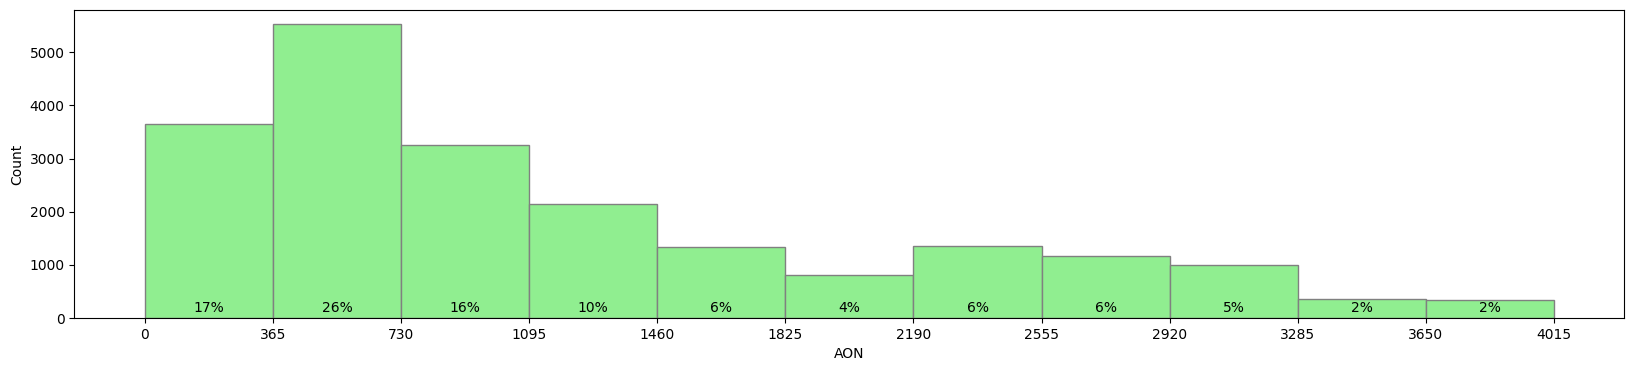

In [55]:
# Customers distribution of the age on network
print(hv_users.aon.describe())
plot_hist(hv_users,'aon',365)

- **Minimun Age** on network is 180 days.
- **Average age** on network for customers is 1200 days (3.2 years).
- More than 25% of the **HV users are in their 2nd year** with the network.
- Around 70% users have Age on network **less than 4 years.**
- 16% users are with the network from **over 7 years.**

In [56]:
#Create Derived categorical variable
hv_users['aon_bin'] = pd.cut(churn_data['aon'], range(0,churn_data['aon'].max(),365), labels=range(0,int(round(churn_data['aon'].max()/365))-1))

Since `aon_bin` is a representational variable, we won't need it for predictions. So we won't create it on the unseen data

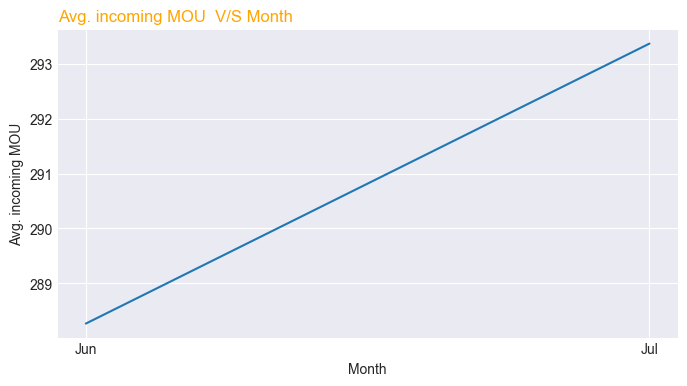

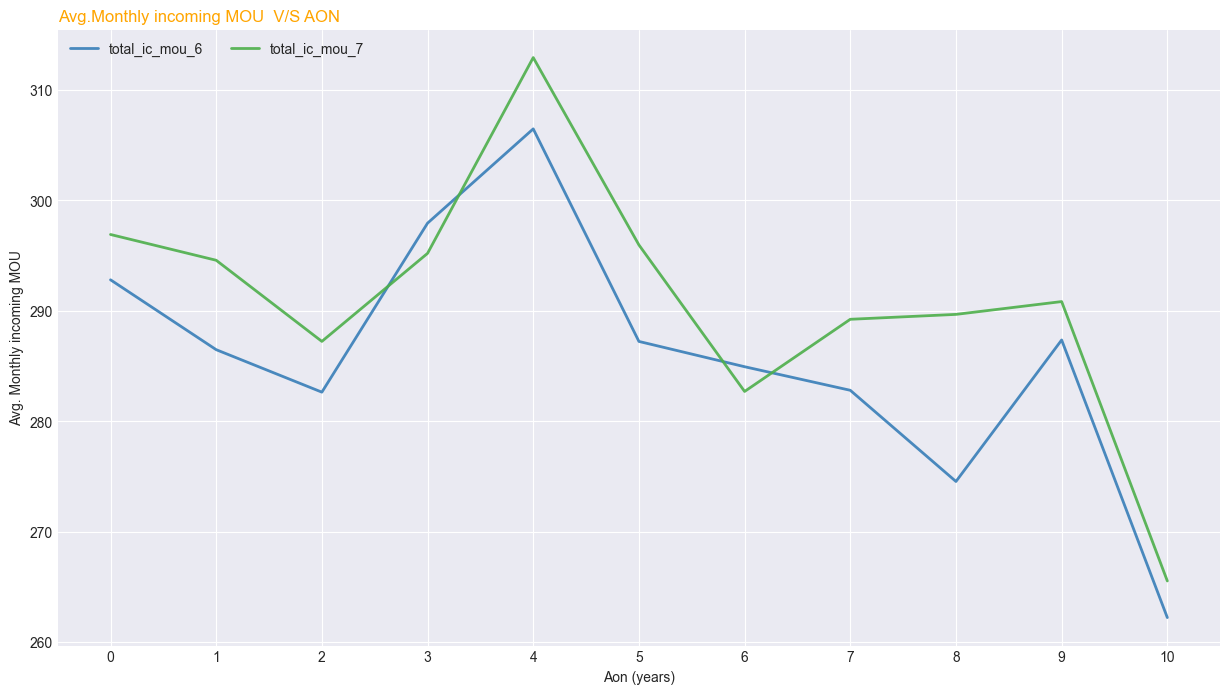

In [57]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = hv_users.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='incoming',colList=ic_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='incoming',colList=ic_col)

It is evident from the plot that,
- The more a customer stays on with the operator(AON), more are the total monthly incoming MOU.
- Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
- Althought the Total incoming mou avg inceases from jun to july, it drop little from aug and reduces lower than that for jun.

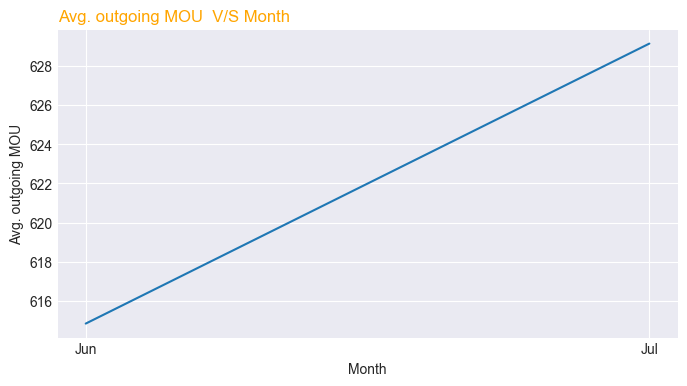

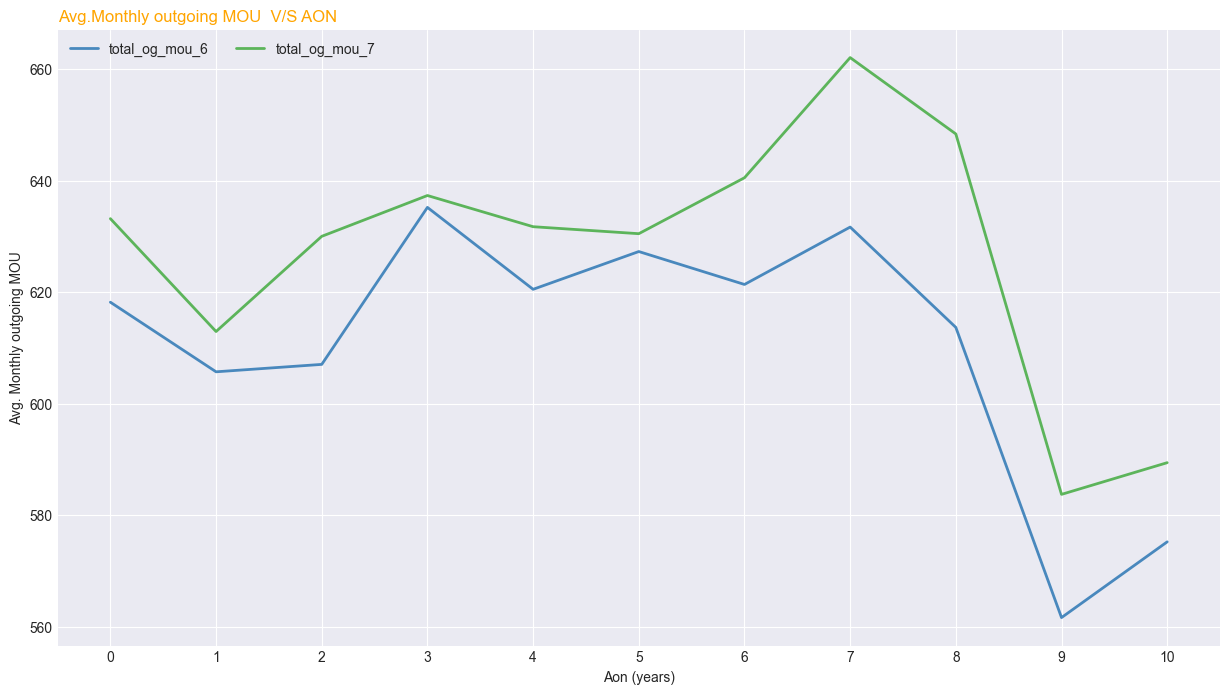

In [58]:
# Plotting Avg. total monthly outgoing MOU vs AON
og_col = hv_users.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls('single',hv_users,calltype='outgoing',colList=og_col)
plot_avgMonthlyCalls('multi',hv_users,calltype='outgoing',colList=og_col)

From this plot,
- Overall, the Avg. total outgoing usage reduces as the years go by.
- Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands
- Seems like the lowst point always occurs at the 9th year for both months Jun and Jul
- The Avg. outgoing usage seems to peak in the AON band between 6 - 8  years.

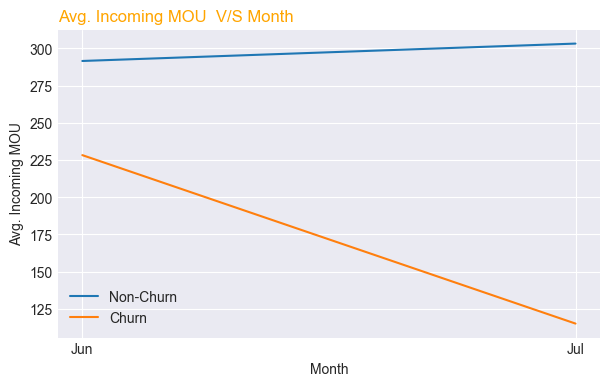

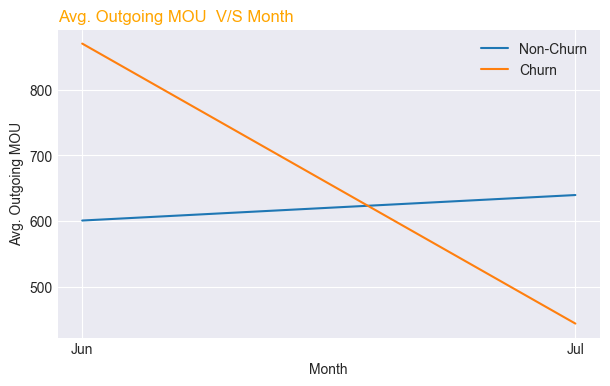

In [59]:
ic_col = ['total_ic_mou_6','total_ic_mou_7']
og_col = ['total_og_mou_6','total_og_mou_7']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

It can be observed,
- Churners Avg. Incoming/Outgoing MOU's **drops drastically after the 2nd month,Jul.**
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

In [60]:
# Avg.Incoming MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7'].mean()

,total_ic_mou_6,total_ic_mou_7
churn,,
0,291.604561,303.299781
1,228.287489,115.003146


In [61]:
# Avg. Outgoing MOU per month churn vs Non-Churn
hv_users.groupby(['churn'])['total_og_mou_6','total_og_mou_7'].mean()

,total_og_mou_6,total_og_mou_7
churn,,
0,600.606894,639.481183
1,870.433690,443.453454


**Create new feature:** og_to_ic_mou_6, og_to_ic_mou_7
These features will hold the **ratio** (=total_og_mou_* / total_ic_mou_*) for each month. These features will combine both incoming and outgoing informations and should be a **better predictor of churn.**

In [62]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,8):
    hv_users['og_to_ic_mou_'+str(i)] = (hv_users['total_og_mou_'+str(i)])/(hv_users['total_ic_mou_'+str(i)]+1)
    hv_users_unseen['og_to_ic_mou_'+str(i)] = (hv_users_unseen['total_og_mou_'+str(i)])/(hv_users_unseen['total_ic_mou_'+str(i)]+1)

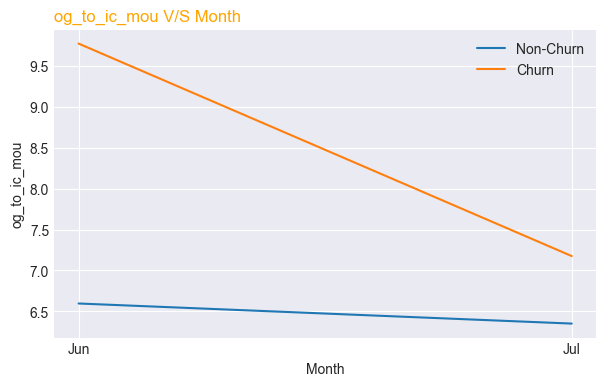

,og_to_ic_mou_6,og_to_ic_mou_7
churn,,
0,6.59670,6.351431
1,9.77023,7.175598


In [63]:
plot_byChurn(hv_users,'og_to_ic_mou')

- Outgoing to incoming mou remains drops significantly for churners from month Jun to Jul.
- While it remains almost consistent for the non-churners.

**Create new feature:** loc_og_to_ic_mou_6, loc_og_to_ic_mou_7
These features will hold the **ratio** (=loc_og_mou_* / loc_ic_mou_*) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a **better predictor of churn.**

In [64]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7
# adding 1 to denominator to avoid dividing by 0 and getting nan values.
for i in range(6,8):
    hv_users['loc_og_to_ic_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])/(hv_users['loc_ic_mou_'+str(i)]+1)
    hv_users_unseen['loc_og_to_ic_mou_'+str(i)] = (hv_users_unseen['loc_og_mou_'+str(i)])/(hv_users_unseen['loc_ic_mou_'+str(i)]+1)

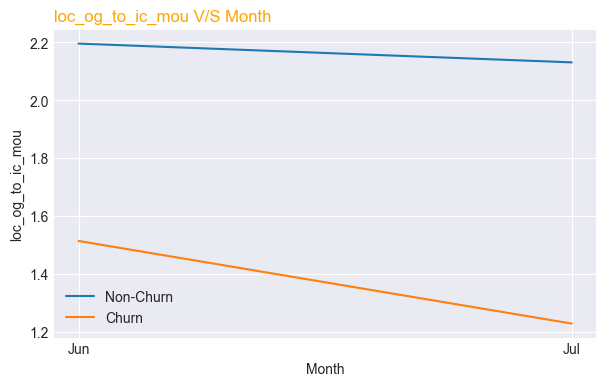

,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7
churn,,
0,2.195195,2.130405
1,1.514395,1.229422


In [65]:
plot_byChurn(hv_users,'loc_og_to_ic_mou')

It can be observed that,
- The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 2 months.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

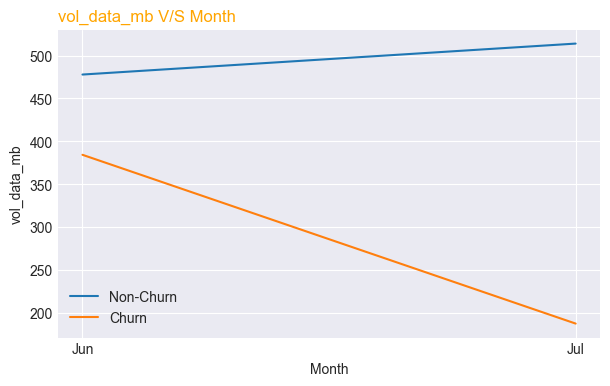

,vol_data_mb_6,vol_data_mb_7
churn,,
0,477.937159,514.040985
1,384.339075,187.517679


In [66]:
plot_byChurn(hv_users,'vol_data_mb')

- The volume of data mb used drops significantly for churners from month Jun to Jul.
- While it remains almost consistent for the non-churners.

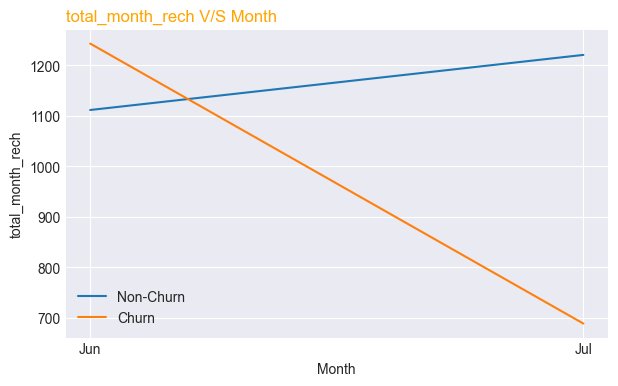

,total_month_rech_6,total_month_rech_7
churn,,
0,1111.404846,1220.491563
1,1242.918858,688.379864


In [67]:
plot_byChurn(hv_users,'total_month_rech')

- total monthly rech amount also drops significantly for churners from month Jun to Jul.
- While it remains almost consistent for the non-churners.

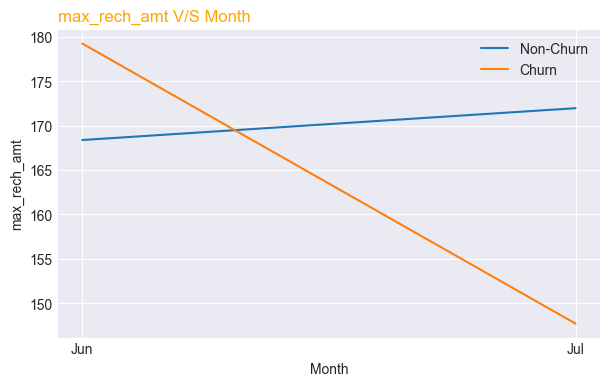

,max_rech_amt_6,max_rech_amt_7
churn,,
0,168.384767,171.969766
1,179.247507,147.708069


In [68]:
plot_byChurn(hv_users,'max_rech_amt')

- maximum recharge amount also drops significantly for churners from month Jun to Jul.
- While it remains almost consistent for the non-churners.

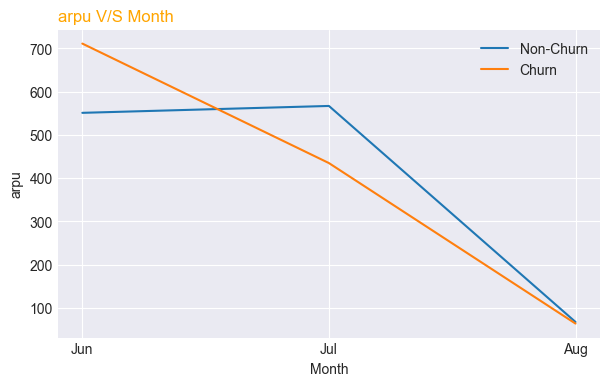

,arpu_6,arpu_7,arpu_3g_6
churn,,,
0,550.827266,566.752381,67.474324
1,710.888170,434.731197,63.753835


In [69]:
plot_byChurn(hv_users,'arpu')

- Ignoring the arpu_3g field,
- Average revenue per user,arpu also drops significantly for churners from month Jun to Jul.
- While it remains almost consistent for the non-churners.

In [70]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,8):
    hv_users['Total_loc_mou_'+str(i)] = (hv_users['loc_og_mou_'+str(i)])+(hv_users['loc_ic_mou_'+str(i)])
    hv_users_unseen['Total_loc_mou_'+str(i)] = (hv_users_unseen['loc_og_mou_'+str(i)])+(hv_users_unseen['loc_ic_mou_'+str(i)])

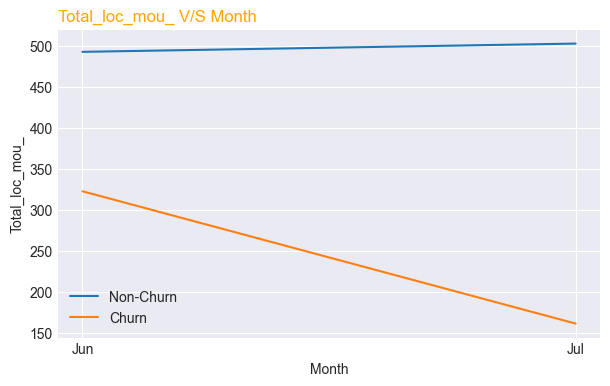

,Total_loc_mou_6,Total_loc_mou_7
churn,,
0,492.763258,502.841247
1,322.550426,161.023164


In [71]:
plot_byChurn(hv_users,'Total_loc_mou_')

It can be observed that,
- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 2 months.
- The churners genrally show a low total loc mou but it drops dramatically at the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

**Create new feature:** Total_roam_mou_6,Total_roam_mou_7<br>
These features will hold the **Total roaming MOU** (=roam_ic_mou+roam_og_mou) for each month.<br>
Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by.<br>
This informations should be a **better predictor of churn.**

In [72]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,8):
    hv_users['Total_roam_mou_'+str(i)] = (hv_users['roam_ic_mou_'+str(i)])+(hv_users['roam_og_mou_'+str(i)])
    hv_users_unseen['Total_roam_mou_'+str(i)] = (hv_users_unseen['roam_ic_mou_'+str(i)])+(hv_users_unseen['roam_og_mou_'+str(i)])

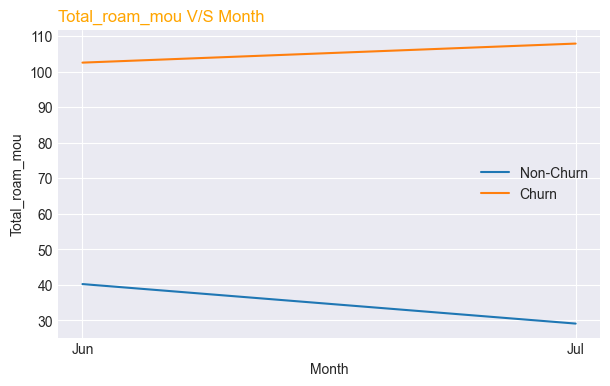

,Total_roam_mou_6,Total_roam_mou_7
churn,,
0,40.194394,29.078340
1,102.507652,107.865204


In [73]:
plot_byChurn(hv_users,'Total_roam_mou')

It can be observed that,
- Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.
- This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.
- Or it could also mean that consumers who tend to travel a lot only require a connection while they are residing in specific areas and for a short period

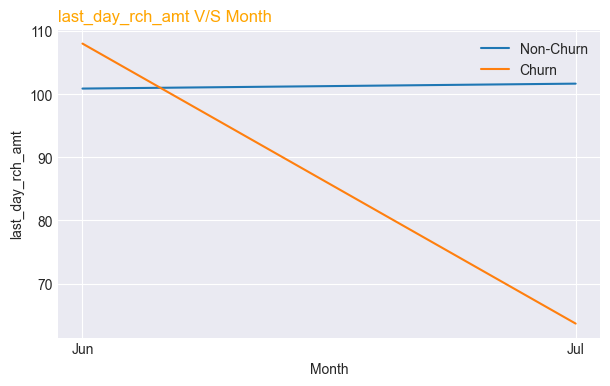

,last_day_rch_amt_6,last_day_rch_amt_7
churn,,
0,100.888906,101.668332
1,108.012693,63.673617


In [74]:
plot_byChurn(hv_users,'last_day_rch_amt')

- The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
- Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

### Modelling

In [75]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [77]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))
    
    

In [78]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [79]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [80]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

#### Splitting the data

In [81]:
# creating copy of the final hv_user dataframe
hv_users_PCA = hv_users.copy()
unseen_data_PCA = unseen_data.copy()
# removing the columns not required for modeling
hv_users_PCA.drop(['aon_bin'], axis=1, inplace=True)

In [82]:
# removing the datatime columns before PCA
dateTimeCols = list(hv_users_PCA.select_dtypes(include=['datetime64']).columns)
print(dateTimeCols)
hv_users_PCA.drop(dateTimeCols, axis=1, inplace=True)

['last_date_of_month_6', 'last_date_of_month_7', 'date_of_last_rech_6', 'date_of_last_rech_7']


In [83]:
from sklearn.model_selection import train_test_split
# hv_users_PCA["churn_probability"]
#putting features variables in X
X = hv_users_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = hv_users_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [84]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [85]:
X_train.columns

Index(['id', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       ...
       'total_month_rech_6', 'total_month_rech_7', 'og_to_ic_mou_6',
       'og_to_ic_mou_7', 'loc_og_to_ic_mou_6', 'loc_og_to_ic_mou_7',
       'Total_loc_mou_6', 'Total_loc_mou_7', 'Total_roam_mou_6',
       'Total_roam_mou_7'],
      dtype='object', length=121)

In [86]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

**Informed Over Sampling: Synthetic Minority Over-sampling Technique**

This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. The new dataset is used as a sample to train the classification models.

**Advantages**
- Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
- No loss of useful information

In [87]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 759
Before OverSampling, counts of label '0': 13881 

Before OverSampling, churn event rate : 5.18% 



In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [89]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (27762, 121)
After OverSampling, the shape of train_y: (27762,) 

After OverSampling, counts of label '1': 13881
After OverSampling, counts of label '0': 13881
After OverSampling, churn event rate : 50.0% 



In [90]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [91]:
#Doing PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

Taking a look at the PCA model and the variance explained

In [92]:
pca.explained_variance_ratio_[:50]

array([3.91130369e-01, 2.22688892e-01, 9.47289097e-02, 7.37479582e-02,
       4.14095067e-02, 2.42443797e-02, 1.77522209e-02, 1.44171898e-02,
       1.42432895e-02, 1.25417774e-02, 1.09439864e-02, 9.13175535e-03,
       7.10949661e-03, 6.63549168e-03, 4.89582058e-03, 4.31182574e-03,
       3.76068766e-03, 3.47390337e-03, 3.21796900e-03, 2.95529462e-03,
       2.77175319e-03, 2.38849385e-03, 2.14050656e-03, 2.04114962e-03,
       1.99633122e-03, 1.81460266e-03, 1.79467823e-03, 1.65877713e-03,
       1.54561423e-03, 1.43733171e-03, 1.11651308e-03, 1.06875776e-03,
       9.73822898e-04, 7.64939691e-04, 7.52775922e-04, 6.92442500e-04,
       6.62466350e-04, 6.34189258e-04, 5.82511340e-04, 5.73116301e-04,
       5.61928260e-04, 5.51539779e-04, 5.05585870e-04, 4.95925879e-04,
       4.84252452e-04, 4.39378852e-04, 4.34493136e-04, 4.16112721e-04,
       3.86696090e-04, 3.67882330e-04])

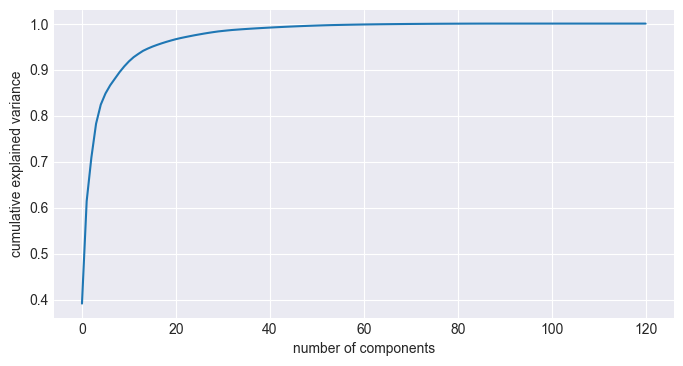

In [93]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### **Looks like 30 components are enough to describe 95% of the variance in the dataset**
- We'll choose 30 components for our model


In [94]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=30)

In [95]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(27762, 30)

In [96]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.07514442221112938 , min corr:  -0.05069702981524449


there is no correlation between any two components! We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [97]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(6275, 30)

#### Logistic Regression with PCA

In [98]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [99]:
modelfit(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8892
Recall/Sensitivity : 0.855
AUC Score (Train): 0.957806
CV Score : Mean - 0.957296 | Std - 0.001534601 | Min - 0.9560381 | Max - 0.9601986


##### Test Data

In [100]:
# predictions on Test data
pred_probs_test = lr0.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.87731955276376
Sensitivity/Recall : 0.8284883720930233
Specificity: 0.9261507334344967
False Positive Rate: 0.0738492665655033
Positive predictive value: 0.3941908713692946
Negative Predictive value: 0.9893731988472623
sklearn precision score value: 0.3941908713692946


In [101]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.9207968127490039
Recall : 0.8284883720930233
Precision : 0.3941908713692946


In [102]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.96


In [103]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8891650457459838
Sensitivity/Recall : 0.8549816295655932
Specificity: 0.9233484619263742
False Positive Rate: 0.07665153807362582
Positive predictive value: 0.917723476647077
Negative Predictive value: 0.8642616318273769
sklearn precision score value: 0.917723476647077


,churn,churn_Prob,final_predicted
0,0,0.193329,0
1,0,0.159373,0
2,0,0.035624,0
3,0,0.896192,1
4,0,0.970284,1


**Plotting the ROC Curve :**
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

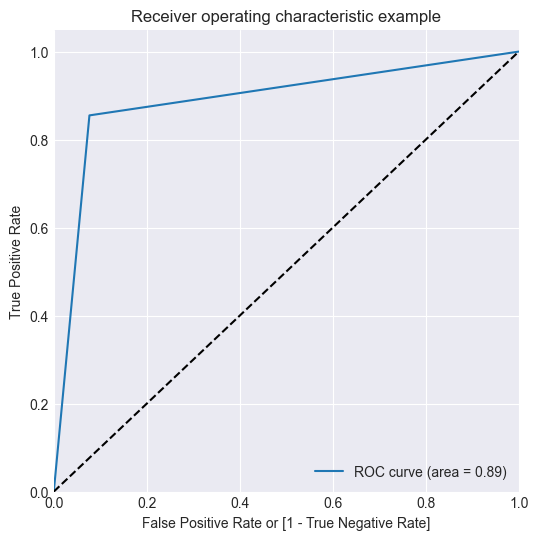

(array([0.        , 0.07665154, 1.        ]),
 array([0.        , 0.85498163, 1.        ]),
 array([2, 1, 0]))

In [104]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [105]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.89


**Finding Optimal Cutoff Point**<br>
Since recall or sensitivity is a much more important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.765903  0.992868  0.538938
0.2   0.2  0.853505  0.970031  0.736979
0.3   0.3  0.885671  0.932786  0.838556
0.4   0.4  0.892227  0.892011  0.892443
0.5   0.5  0.889165  0.854982  0.923348
0.6   0.6  0.879620  0.818601  0.940638
0.7   0.7  0.864419  0.777610  0.951228
0.8   0.8  0.852964  0.745696  0.960233
0.9   0.9  0.828074  0.683956  0.972192


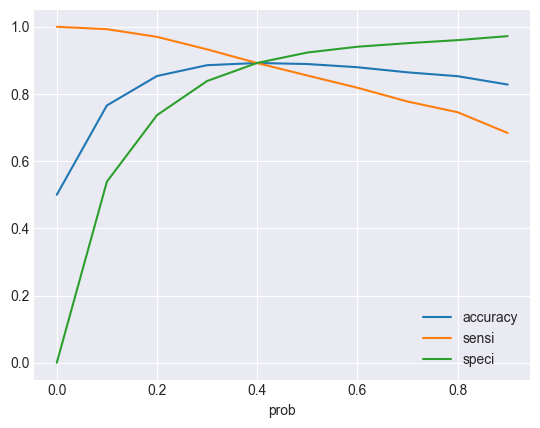

In [106]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

#### **From the curve above, 0.4 is the optimum point .**
Although, other cutoff between 0.3 and 0.5 can also be taken but to keep the test sensitivity/recall significant we choose 0.4. At this point there is a balance of sensitivity, specificity and accuracy.

In [107]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.4
predictChurnWithProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.8922267848137742
Sensitivity/Recall : 0.8920106620560478
Specificity: 0.8924429075715006
False Positive Rate: 0.10755709242849938
Positive predictive value: 0.8923963963963965
Negative Predictive value: 0.8920573197954922
sklearn precision score value: 0.8923963963963965


,churn,churn_Prob,final_predicted
0,0,0.193329,0
1,0,0.159373,0
2,0,0.035624,0
3,0,0.896192,1
4,0,0.970284,1
...,...,...,...
27757,1,0.948488,1
27758,1,0.414069,1
27759,1,0.525226,1
27760,1,0.986676,1


In [108]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.8754996902361654
Sensitivity/Recall : 0.8575581395348837
Specificity: 0.8934412409374473
False Positive Rate: 0.10655875906255269
Positive predictive value: 0.3182308522114347
Negative Predictive value: 0.9908376963350786
sklearn precision score value: 0.3182308522114347


,churn,churn_Prob,final_predicted
10721,0,0.903761,1
1335,0,0.030234,0
20829,0,0.010730,0
17263,0,0.007147,0
13119,0,0.033239,0
...,...,...,...
1989,0,0.066528,0
3996,1,0.972105,1
11887,0,0.054066,0
16558,1,0.989388,1


The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.
- **train sensitivity  :** 89.20%, **train roc auc score  :** 89.22%
- **test sensitivity   :** 85.75%, **test roc auc score  :** 87.54%

### 2. Decision Tree

In [109]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8601
Recall/Sensitivity : 0.775
AUC Score (Train): 0.935806
CV Score : Mean - 0.9235014 | Std - 0.01451593 | Min - 0.8946578 | Max - 0.9337321


In [110]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.854973670074069
Sensitivity/Recall : 0.7674418604651163
Specificity: 0.9425054796830215
False Positive Rate: 0.05749452031697859
Positive predictive value: 0.43636363636363634
Negative Predictive value: 0.9858906525573192
sklearn precision score value: 0.43636363636363634


In [111]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [112]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [113]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8937160101739469 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [114]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=11,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [115]:
modelfit(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.906
Recall/Sensitivity : 0.9129
AUC Score (Train): 0.971250
CV Score : Mean - 0.9616488 | Std - 0.0009029188 | Min - 0.960766 | Max - 0.9631548


In [116]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.8693688659898915
Sensitivity/Recall : 0.8488372093023255
Specificity: 0.8899005226774575
False Positive Rate: 0.11009947732254258
Positive predictive value: 0.308994708994709
Negative Predictive value: 0.9902439024390244
sklearn precision score value: 0.308994708994709


In [117]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5931
           1       0.31      0.85      0.45       344

    accuracy                           0.89      6275
   macro avg       0.65      0.87      0.70      6275
weighted avg       0.95      0.89      0.91      6275



After hyperparameter tuning for the Decision Tree. The recall rate is about 84.88% which is pretty good to predict the churn.<br> This makes decision trees a viable option

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [118]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9059866003890209
Sensitivity/Recall : 0.9129025286362654
Specificity: 0.8990706721417765
False Positive Rate: 0.10092932785822348
Positive predictive value: 0.9004476657429119
Negative Predictive value: 0.9116809116809117
sklearn precision score value: 0.9004476657429119


,churn,churn_Prob,final_predicted
0,0,0.073171,0
1,0,0.060000,0
2,0,0.003846,0
3,0,0.887574,1
4,0,0.942308,1


     prob  accuracy     sensi     speci
0.0   0.0  0.778294  1.000000  0.556588
0.1   0.1  0.847958  0.994165  0.701751
0.2   0.2  0.867265  0.984151  0.750378
0.3   0.3  0.895973  0.952525  0.839421
0.4   0.4  0.903789  0.934875  0.872704
0.5   0.5  0.905987  0.912903  0.899071
0.6   0.6  0.903501  0.893091  0.913911
0.7   0.7  0.892803  0.842663  0.942944
0.8   0.8  0.865500  0.758951  0.972048
0.9   0.9  0.820942  0.655140  0.986744


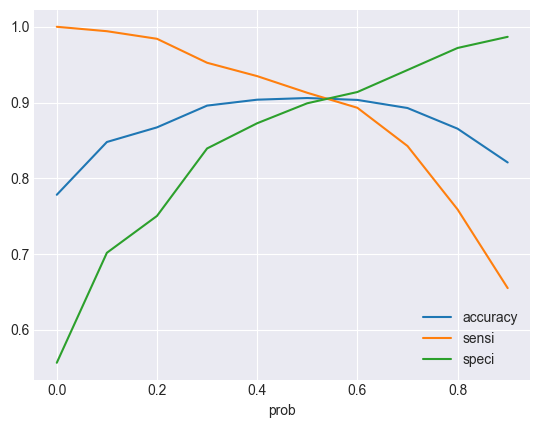

In [119]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, let'choose 0.55 as the optimum point to make a high enough sensitivity.**

In [120]:
cut_off_prob=0.55
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9057704776312947
Sensitivity/Recall : 0.9090843599164325
Specificity: 0.9024565953461566
False Positive Rate: 0.09754340465384338
Positive predictive value: 0.9030988334645388
Negative Predictive value: 0.9084777721372108
sklearn precision score value: 0.9030988334645388


,churn,churn_Prob,final_predicted
0,0,0.073171,0
1,0,0.060000,0
2,0,0.003846,0
3,0,0.887574,1
4,0,0.942308,1


In [121]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8712235279356005
Sensitivity/Recall : 0.8488372093023255
Specificity: 0.8936098465688754
False Positive Rate: 0.1063901534311246
Positive predictive value: 0.3163596966413868
Negative Predictive value: 0.9902840059790733
sklearn precision score value: 0.3163596966413868


,churn,churn_Prob,final_predicted
10721,0,0.987730,1
1335,0,0.004115,0
20829,0,0.000000,0
17263,0,0.000000,0
13119,0,0.000000,0


- Decision tree after selecting optimal cut-off also is resulting in a model with
<br>**Train Recall : 90.90%**  and  **Train Roc_auc_score : 90.57**
<br>**Test Recall : 84.88%**  and  **Test Roc_auc_score : 87.12**

### 3. Random Forest

##### Applying Random Forest Classifier on our principal components with Hyperparameter tuning

In [122]:
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("f1")
    plt.legend()
    plt.show()

#### Tuning max_depth

In [123]:
parameters = {'max_depth': range(10, 30, 5)}
rf0 = RandomForestClassifier()
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                    scoring="f1",
                    return_train_score=True)
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='f1')

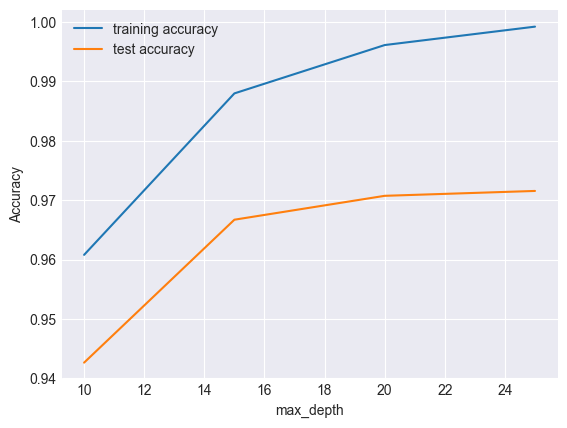

In [124]:
scores = rfgs.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test f1-score almost becomes constant after max_depth=20

#### Tuning n_estimators

In [125]:
parameters = {'n_estimators': range(50, 150, 25)}
rf1 = RandomForestClassifier(max_depth=20,random_state=10)
rfgs = GridSearchCV(rf1, parameters, 
                    cv=3, 
                   scoring="recall",
                   return_train_score=True)

In [126]:
rfgs.fit(X_train_pca,y_train_res)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=20, random_state=10),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='recall')

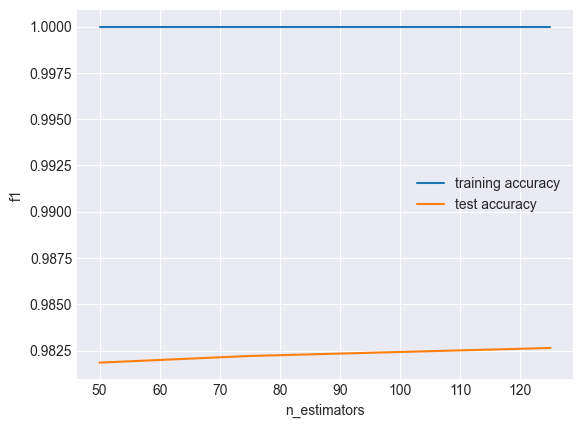

In [127]:
plot_traintestAcc(rfgs.cv_results_,'n_estimators')

Selecting n_estimators = 80

#### Tuning max_features

In [128]:
parameters = {'max_features': [4, 8, 14, 20, 24]}
rf3 = RandomForestClassifier(max_depth=20,n_estimators=80,random_state=10)
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="f1",
                   return_train_score=True)

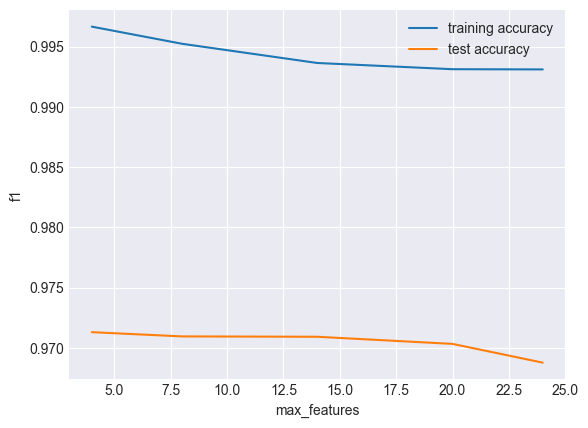

In [129]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'max_features')

Selecting max_features = 5

#### Tuning min_sample_leaf

In [130]:
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf4 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,random_state=10)
rfgs = GridSearchCV(rf4, parameters, 
                    cv=3, 
                   scoring="f1",
                   return_train_score=True)

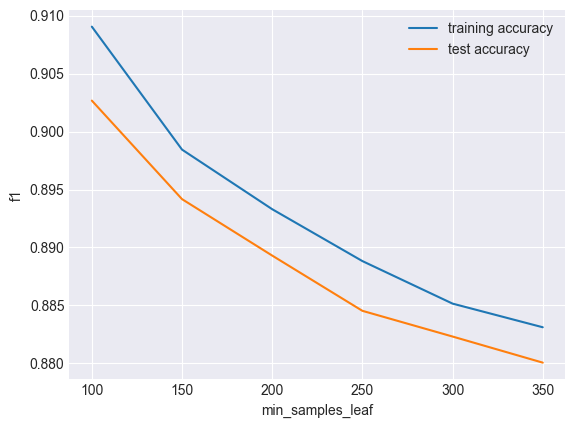

In [131]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_leaf')

Selecting min_sample_leaf = 100

#### Tuning min_sample_split

In [132]:
parameters = {'min_samples_split': range(50, 300, 50)}
rf5 = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100,random_state=10)
rfgs = GridSearchCV(rf5, parameters, 
                    cv=3, 
                   scoring="f1",
                   return_train_score=True)

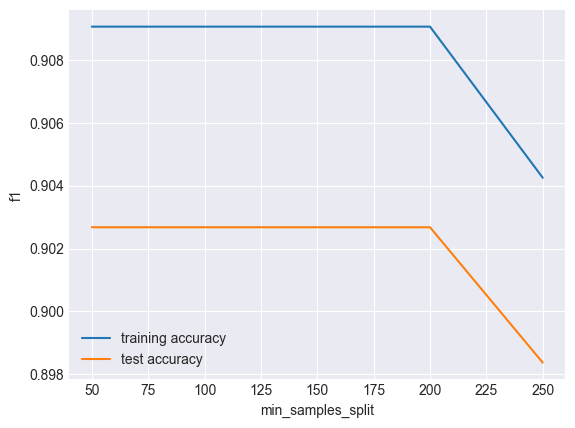

In [133]:
rfgs.fit(X_train_pca,y_train_res)
plot_traintestAcc(rfgs.cv_results_,'min_samples_split')

Selecting min_sample_split = 150

#### Tuned Random Forest

In [134]:
rf_final = RandomForestClassifier(max_depth=20,
                                  n_estimators=80,
                                  max_features=5,
                                  min_samples_leaf=100,
                                  min_samples_split=50,
                                  random_state=10)

In [135]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train_res)

Model performance on Train data:

Model Report
Accuracy : 0.9175
Recall/Sensitivity : 0.8998
AUC Score (Train): 0.978171
CV Score : Mean - 0.9718564 | Std - 0.0019097 | Min - 0.9687144 | Max - 0.9743235


In [136]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [137]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.8801858484980375
Sensitivity/Recall : 0.8284883720930233
Specificity: 0.9318833249030518
False Positive Rate: 0.06811667509694824
Positive predictive value: 0.41364296081277213
Negative Predictive value: 0.989437880415324
sklearn precision score value: 0.41364296081277213


After hyperparameter tuning for the random forest. The Recall rate(Test) is 82.84%.

Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [138]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9175131474677617
Sensitivity/Recall : 0.8997910813341978
Specificity: 0.9352352136013256
False Positive Rate: 0.06476478639867445
Positive predictive value: 0.9328553290014191
Negative Predictive value: 0.9032213177485563
sklearn precision score value: 0.9328553290014191


,churn,churn_Prob,final_predicted
0,0,0.230232,0
1,0,0.071107,0
2,0,0.124741,0
3,0,0.839342,1
4,0,0.913660,1


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.741193  0.999928  0.482458
0.2   0.2  0.867697  0.996542  0.738852
0.3   0.3  0.919818  0.980189  0.859448
0.4   0.4  0.930408  0.952309  0.908508
0.5   0.5  0.917513  0.899791  0.935235
0.6   0.6  0.900295  0.851524  0.949067
0.7   0.7  0.877783  0.796845  0.958721
0.8   0.8  0.856278  0.738275  0.974281
0.9   0.9  0.773792  0.553779  0.993804


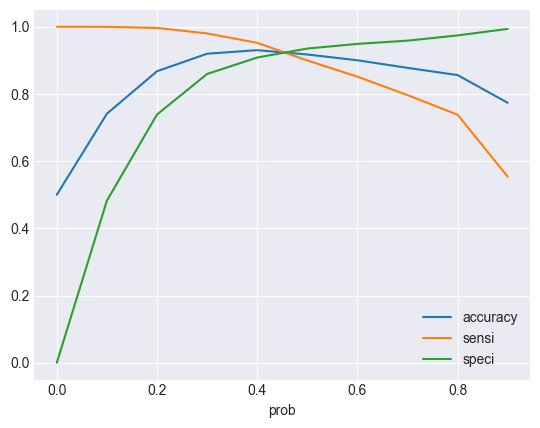

In [139]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

**From the curve above, 0.45 is the optimal point with high enough sensitivity.**

In [140]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9252575462862906
Sensitivity/Recall : 0.9268784669692385
Specificity: 0.9236366256033427
False Positive Rate: 0.0763633743966573
Positive predictive value: 0.9238833835990234
Negative Predictive value: 0.9266406475860075
sklearn precision score value: 0.9238833835990234


,churn,churn_Prob,final_predicted
0,0,0.230232,0
1,0,0.071107,0
2,0,0.124741,0
3,0,0.839342,1
4,0,0.913660,1
...,...,...,...
27757,1,0.936343,1
27758,1,0.445335,0
27759,1,0.759664,1
27760,1,0.974461,1


**Making prediction on test**

In [141]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8833427928934687
Sensitivity/Recall : 0.8459302325581395
Specificity: 0.9207553532287979
False Positive Rate: 0.07924464677120216
Positive predictive value: 0.3823915900131406
Negative Predictive value: 0.9903881030105187
sklearn precision score value: 0.3823915900131406


,churn,churn_Prob,final_predicted
10721,0,0.619749,1
1335,0,0.119134,0
20829,0,0.021939,0
17263,0,0.028640,0
13119,0,0.055466,0


- Random Forest after selecting optimal cut-off Resulted in a model with
<br>**Train Recall : 92.68%**  and  **Train Roc_auc_score : 92.52**
<br>**Test Recall : 84.59%**  and  **Test Roc_auc_score : 88.33**

### 4. Boosting models

###### 4.1 Gradiant boosting Classifier

###### Applying Gradiant boosting Classifier on our principal components with Hyperparameter tuning

In [142]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9275
Recall/Sensitivity : 0.9262
AUC Score (Train): 0.979557
CV Score : Mean - 0.975316 | Std - 0.001767067 | Min - 0.9727861 | Max - 0.9780401


In [143]:
# Hyperparameter tuning for n_estimators
param_test1 = {'n_estimators':range(20,150,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10), 
                        param_grid = param_test1, 
                        scoring='f1',
                        return_train_score=True,
                        n_jobs=4,
                        cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 150, 10)},
             return_train_score=True, scoring='f1')

In [144]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.9620936937799667)

In [145]:
# Hyperparameter tuning for max_depth and min_sample_split
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=140, 
                                                               max_features='sqrt', 
                                                               subsample=0.8, 
                                                               random_state=10), 
                        param_grid = param_test2, 
                        scoring='f1',
                        return_train_score=True,
                        n_jobs=4,
                        cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             return_train_score=True, scoring='f1')

In [146]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 15, 'min_samples_split': 200}, 0.9723766228676899)

In [147]:
# Hyperparameter tuning for min_sample_leaf
param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=140,
                                                               max_depth=15,
                                                               min_samples_split=200, 
                                                               max_features='sqrt', 
                                                               subsample=0.8, 
                                                               random_state=10), 
                        param_grid = param_test3, 
                        scoring='f1',
                        return_train_score=True,
                        n_jobs=4,
                        cv=3)
gsearch3.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  max_features='sqrt',
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'min_samples_leaf': range(30, 71, 10)},
             return_train_score=True, scoring='f1')

In [148]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 40}, 0.9724638488033036)

In [149]:
# Hyperparameter tuning for max_features
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                                               n_estimators=140,
                                                               max_depth=15, 
                                                               min_samples_split=200, 
                                                               min_samples_leaf=40, 
                                                               subsample=0.8, 
                                                               random_state=10),
                        param_grid = param_test4, 
                        scoring='f1',
                        return_train_score=True,
                        n_jobs=4, 
                        cv=3)
gsearch4.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=GradientBoostingClassifier(max_depth=15,
                                                  min_samples_leaf=40,
                                                  min_samples_split=200,
                                                  n_estimators=140,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'max_features': range(7, 20, 2)},
             return_train_score=True, scoring='f1')

In [150]:
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 17}, 0.9736470050934862)

#### Tuned GradientBoostingClassifier

In [151]:
# Tuned GradientBoostingClassifier
gbm_final = GradientBoostingClassifier(learning_rate=0.1, 
                                       n_estimators=140,
                                       max_features=17,
                                       max_depth=15, 
                                       min_samples_split=200, 
                                       min_samples_leaf=40, 
                                       subsample=0.8, 
                                       random_state=10)
modelfit(gbm_final, X_train_pca, y_train_res)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9950563 | Std - 0.0009047634 | Min - 0.9934828 | Max - 0.9962246


In [152]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_pca)

In [153]:
# model Performance on test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.8383574380570359
Sensitivity/Recall : 0.7180232558139535
Specificity: 0.958691620300118
False Positive Rate: 0.04130837969988198
Positive predictive value: 0.5020325203252033
Negative Predictive value: 0.9832266989451841
sklearn precision score value: 0.5020325203252033


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [154]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 1.0
Sensitivity/Recall : 1.0
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 1.0
sklearn precision score value: 1.0


,churn,churn_Prob,final_predicted
0,0,0.001743,0
1,0,0.000259,0
2,0,0.000759,0
3,0,0.043404,0
4,0,0.081944,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.996182  1.000000  0.992364
0.2   0.2  0.999604  1.000000  0.999208
0.3   0.3  0.999964  1.000000  0.999928
0.4   0.4  1.000000  1.000000  1.000000
0.5   0.5  1.000000  1.000000  1.000000
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  1.000000  1.000000  1.000000
0.8   0.8  1.000000  1.000000  1.000000
0.9   0.9  0.999784  0.999568  1.000000


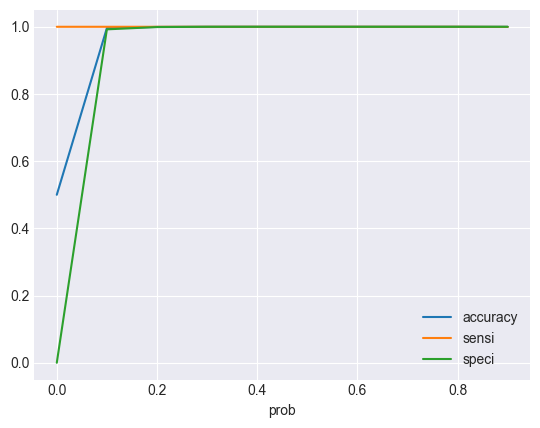

In [155]:
findOptimalCutoff(y_train_df)

In [156]:
cut_off_prob=0.1
predictChurnWithProb(gbm_final,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9961818312801671
Sensitivity/Recall : 1.0
Specificity: 0.9923636625603343
False Positive Rate: 0.00763633743966573
Positive predictive value: 0.9924215342818331
Negative Predictive value: 1.0
sklearn precision score value: 0.9924215342818331


,churn,churn_Prob,final_predicted
0,0,0.001743,0
1,0,0.000259,0
2,0,0.000759,0
3,0,0.043404,0
4,0,0.081944,0
...,...,...,...
27757,1,0.991098,1
27758,1,0.947123,1
27759,1,0.982743,1
27760,1,0.998915,1


**Making prediction on test**

In [157]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8704096626711053
Sensitivity/Recall : 0.8168604651162791
Specificity: 0.9239588602259315
False Positive Rate: 0.07604113977406846
Positive predictive value: 0.383879781420765
Negative Predictive value: 0.9886343135486199
sklearn precision score value: 0.383879781420765


,churn,churn_Prob,final_predicted
10721,0,0.435054,1
1335,0,0.001857,0
20829,0,0.000204,0
17263,0,0.000094,0
13119,0,0.000289,0


This model is over-fitting the Training data with a lower performance on the Test data.

###### 4.2 XGBoost Classifier

##### Applying XGBoost Classifier on our principal components with Hyperparameter tuning

In [158]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [159]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train_res)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9952044 | Std - 0.0008129765 | Min - 0.9936483 | Max - 0.9959749


In [160]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=140, 
                                                  max_depth=5,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=4, 
                                                  scale_pos_weight=1, 
                                                  seed=27), 
                        param_grid = param_test1, 
                        scoring='f1',
                        return_train_score=True,
                        cv=3)
gsearch1.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             return_train_score=True, scoring='f1')

In [161]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 0.9727017071470981)

In [162]:
# Some more hyperparameter tuning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, 
                                                  n_estimators=140, 
                                                  max_depth=9,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=4, 
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test2, 
                        scoring='f1',
                        return_train_score=True,
                        n_jobs=4,
                        cv=3)
gsearch2.fit(X_train_pca, y_train_res)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=9,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=4, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             return_train_score=True, scoring='f1')

In [163]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.2}, 0.9728406838728407)

In [164]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=9,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [165]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train_res)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.9949849 | Std - 0.0009030835 | Min - 0.9933519 | Max - 0.9958328


In [166]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [167]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.8267295310802917
Sensitivity/Recall : 0.6947674418604651
Specificity: 0.958691620300118
False Positive Rate: 0.04130837969988198
Positive predictive value: 0.493801652892562
Negative Predictive value: 0.9818684165083751
sklearn precision score value: 0.493801652892562


Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [168]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9999639795403789
Sensitivity/Recall : 1.0
Specificity: 0.9999279590807578
False Positive Rate: 7.204091924212953e-05
Positive predictive value: 0.9999279642702781
Negative Predictive value: 1.0
sklearn precision score value: 0.9999279642702781


,churn,churn_Prob,final_predicted
0,0,0.004533,0
1,0,0.000596,0
2,0,0.004593,0
3,0,0.050450,0
4,0,0.179638,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.984907  1.000000  0.969815
0.2   0.2  0.997226  1.000000  0.994453
0.3   0.3  0.999099  1.000000  0.998199
0.4   0.4  0.999892  1.000000  0.999784
0.5   0.5  0.999964  1.000000  0.999928
0.6   0.6  1.000000  1.000000  1.000000
0.7   0.7  0.999928  0.999856  1.000000
0.8   0.8  0.999640  0.999280  1.000000
0.9   0.9  0.996326  0.992652  1.000000


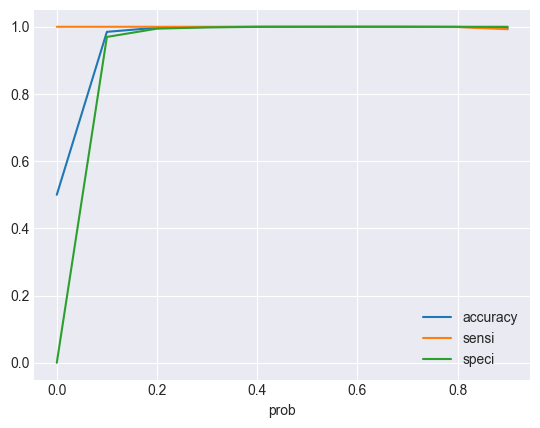

In [169]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [170]:
# Selecting 0.2 as cut-off in an attempt to improve recall rate
cut_off_prob=0.2
predictChurnWithProb(xgb2,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.997226424609178
Sensitivity/Recall : 1.0
Specificity: 0.994452849218356
False Positive Rate: 0.005547150781643974
Positive predictive value: 0.9944834503510531
Negative Predictive value: 1.0
sklearn precision score value: 0.9944834503510531


,churn,churn_Prob,final_predicted
0,0,0.004533,0
1,0,0.000596,0
2,0,0.004593,0
3,0,0.050450,0
4,0,0.179638,0
...,...,...,...
27757,1,0.989464,1
27758,1,0.874477,1
27759,1,0.974725,1
27760,1,0.992932,1


**Making prediction on test**

Storing variables for the sake of re-testing

In [171]:
%store rf_final

Stored 'rf_final' (RandomForestClassifier)


In [172]:
%store pca_final

Stored 'pca_final' (IncrementalPCA)


In [173]:
%store hv_users_unseen

Stored 'hv_users_unseen' (DataFrame)


Since we're working on unseen data, we will have to prepare and process it

In [174]:
hv_users.shape

(20915, 127)

In [175]:
hv_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20915 entries, 0 to 20914
Columns: 127 entries, id to Total_roam_mou_7
dtypes: category(1), datetime64[ns](4), float64(98), int64(24)
memory usage: 20.1 MB


In [176]:
dateTimeCols = list(hv_users_unseen.select_dtypes(include=['datetime64']).columns)
hv_users_unseen.drop(dateTimeCols, axis=1, inplace=True)

In [177]:
hv_users_unseen.columns

Index(['id', 'arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6',
       ...
       'total_month_rech_7', 'churn_probability', 'og_to_ic_mou_6',
       'og_to_ic_mou_7', 'loc_og_to_ic_mou_6', 'loc_og_to_ic_mou_7',
       'Total_loc_mou_6', 'Total_loc_mou_7', 'Total_roam_mou_6',
       'Total_roam_mou_7'],
      dtype='object', length=121)

In [178]:
X_train.shape

(14640, 121)

In [179]:
tr = scaler.fit_transform(hv_users_unseen)

In [180]:
X_test_unseen_pca = pca_final.transform(tr)

In [181]:
X_test_unseen_pca.shape

(30000, 30)

This looks about right, let's run our model on it

Let's use the XGB Model we have since it seems to give us the best scores

In [182]:
xgb_preds = xgb2.predict(X_test_unseen_pca)
xgb_preds

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
kaggle_pred = hv_users_unseen[['id']].copy()
kaggle_pred.set_index('id', inplace=True)

In [184]:
kaggle_pred['churn_probability'] = xgb_preds

In [185]:
kaggle_pred.churn_probability.value_counts()

0    29708
1      292
Name: churn_probability, dtype: int64

In [186]:
kaggle_pred.to_csv('submission.csv')